In [1]:
pip install pandas matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
dados_horarios_qar = pd.read_csv("historical-data.csv", index_col=["estação","data"], parse_dates=["data"])
dados_horarios_qar.head()

objectid  codnum  chuva     pres  rs  \
estação data                                                              
BG      2012-01-01 03:30:00+00:00         1       2    0.2  1008.15 NaN   
        2012-01-01 04:30:00+00:00         2       2    0.4  1007.13 NaN   
        2012-01-01 05:30:00+00:00         3       2    0.0  1006.32 NaN   
        2012-01-01 06:30:00+00:00         4       2    0.2  1005.82 NaN   
        2012-01-01 07:30:00+00:00         5       2    0.4  1005.45 NaN   

                                    temp     ur  dir_vento  vel_vento   so2  \
estação data                                                                  
BG      2012-01-01 03:30:00+00:00  24.67  95.24        NaN        NaN   NaN   
        2012-01-01 04:30:00+00:00  24.72  94.13        NaN        NaN  0.40   
        2012-01-01 05:30:00+00:00  24.49  92.91        NaN        NaN  0.12   
        2012-01-01 06:30:00+00:00  24.54  92.59        NaN        NaN  0.00   
        2012-01-01 07:30:00+00:00  24.78  90.71        NaN        NaN  0.00   

                                   ...    co    no    nox     o3  pm10  pm2_5  \
estação data                       ...                                          
BG      2012-01-01 03:30:00+00:00  ...  0.42  2.18  17.36  28.06  81.0    NaN   
        2012-01-01 04:30:00+00:00  ...  0.35  1.63  11.12  32.81  61.0    NaN   
        2012-01-01 05:30:00+00:00  ...  0.27  1.73  10.47  31.61  26.0    NaN   
        2012-01-01 06:30:00+00:00  ...  0.21  1.18   6.68  37.39  20.0    NaN   
        2012-01-01 07:30:00+00:00  ...  0.16  0.95   9.35  33.45   7.0    NaN   

                                        lat        lon  x_utm_sirgas2000  \
estação data                                                               
BG      2012-01-01 03:30:00+00:00 -22.88791 -43.471074       656828.8045   
        2012-01-01 04:30:00+00:00 -22.88791 -43.471074       656828.8045   
        2012-01-01 05:30:00+00:00 -22.88791 -43.471074       656828.8045   
        2012-01-01 06:30:00+00:00 -22.88791 -43.471074       656828.8045   
        2012-01-01 07:30:00+00:00 -22.88791 -43.471074       656828.8045   

                                   y_utm_sirgas2000  
estação data                                         
BG      2012-01-01 03:30:00+00:00      7.468075e+06  
        2012-01-01 04:30:00+00:00      7.468075e+06  
        2012-01-01 05:30:00+00:00      7.468075e+06  
        2012-01-01 06:30:00+00:00      7.468075e+06  
        2012-01-01 07:30:00+00:00      7.468075e+06  

[5 rows x 24 columns]

In [3]:

dados_horarios_qar.reset_index().groupby("estação").data.agg(["min", "max", "size"])

,min,max,size
estação,,,
AV,2011-01-01 03:30:00+00:00,2020-10-29 12:30:00+00:00,82847
BG,2012-01-01 03:30:00+00:00,2022-01-01 02:30:00+00:00,85374
CA,2011-01-01 03:30:00+00:00,2022-01-01 02:30:00+00:00,92766
CG,2012-01-01 03:30:00+00:00,2022-01-01 02:30:00+00:00,85647
IR,2012-01-01 03:30:00+00:00,2022-01-01 02:30:00+00:00,86365
PG,2012-01-01 03:30:00+00:00,2022-01-01 02:30:00+00:00,84061
SC,2011-01-01 03:30:00+00:00,2022-01-01 02:30:00+00:00,95166
SP,2011-01-01 03:30:00+00:00,2022-01-01 02:30:00+00:00,94867


In [12]:
dados_horarios_qar.groupby(level="estação").agg({"pm10": "count", "pm2_5": "count", "o3": "count", "co": "count", "no2": "count", "so2": "count", "temp": "count", "chuva": "count", "objectid": "size"})

,pm10,pm2_5,o3,co,no2,so2,temp,chuva,objectid
estação,,,,,,,,,
AV,80935,0,80748,80206,0,70916,69833,74956,82847
BG,77456,0,80458,75084,76094,70163,69338,84143,85374
CA,87154,0,87643,87396,0,35688,73581,92307,92766
CG,80959,0,81326,75358,76481,75188,85030,85329,85647
IR,82487,76830,79545,78138,79620,69272,76440,85892,86365
PG,79987,0,77922,0,0,0,79621,83420,84061
SC,88415,0,90559,88526,0,85632,87253,93046,95166
SP,91889,0,87851,91610,57938,83782,91316,92062,94867


<Axes: xlabel='data'>

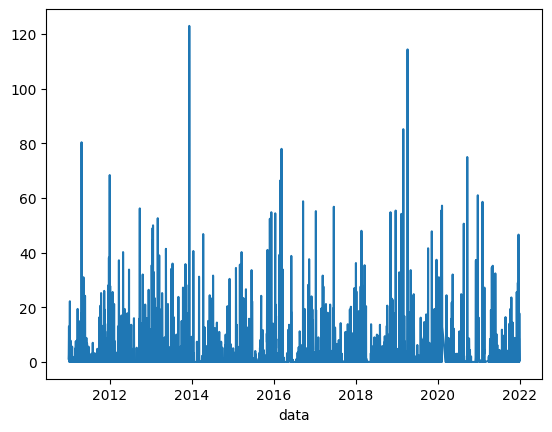

In [34]:
dados_horarios_qar_no_index = dados_horarios_qar.reset_index()
dados_diarios_qar_by_chuva = dados_horarios_qar_no_index.groupby(["estação", dados_horarios_qar_no_index["data"].dt.date]).agg({"chuva": "sum", "pm10": "max", "o3": "max", "so2": "max"})
dados_diarios_qar_by_chuva[dados_diarios_qar_by_chuva.index.isin(["CA"], level="estação")].droplevel("estação")["chuva"].plot()

In [7]:
dados_horarios_qar_av = dados_horarios_qar[dados_horarios_qar.index.isin(["AV"], level="estação")].droplevel("estação")
dados_horarios_qar_bg = dados_horarios_qar[dados_horarios_qar.index.isin(["BG"], level="estação")].droplevel("estação")
dados_horarios_qar_ca = dados_horarios_qar[dados_horarios_qar.index.isin(["CA"], level="estação")].droplevel("estação")
dados_horarios_qar_cg = dados_horarios_qar[dados_horarios_qar.index.isin(["CG"], level="estação")].droplevel("estação")
dados_horarios_qar_ir = dados_horarios_qar[dados_horarios_qar.index.isin(["IR"], level="estação")].droplevel("estação")
dados_horarios_qar_pg = dados_horarios_qar[dados_horarios_qar.index.isin(["PG"], level="estação")].droplevel("estação")
dados_horarios_qar_sc = dados_horarios_qar[dados_horarios_qar.index.isin(["SC"], level="estação")].droplevel("estação")
dados_horarios_qar_sp = dados_horarios_qar[dados_horarios_qar.index.isin(["SP"], level="estação")].droplevel("estação")

<Axes: xlabel='data'>

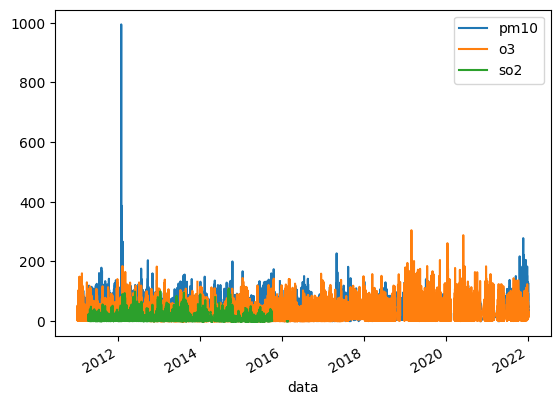

In [8]:
dados_horarios_qar_ca[["pm10", "o3", "so2"]].plot()

<Axes: xlabel='o3', ylabel='temp'>

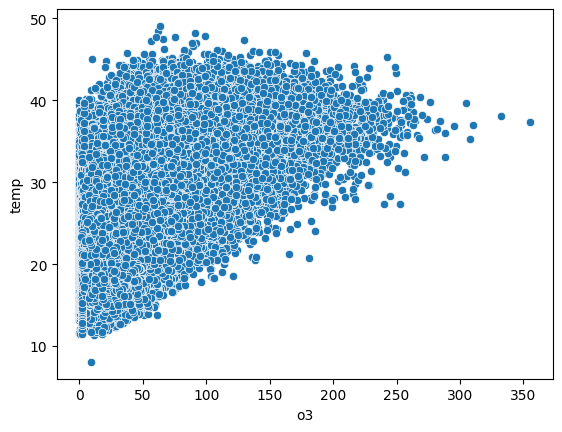

In [9]:
import seaborn as sns
sns.scatterplot(x="o3", y="temp", data=dados_horarios_qar[(dados_horarios_qar["temp"] > 0) & (dados_horarios_qar["chuva"] == 0)])

<Axes: xlabel='temp'>

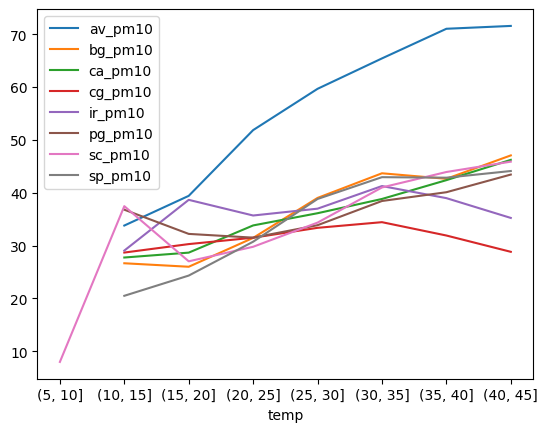

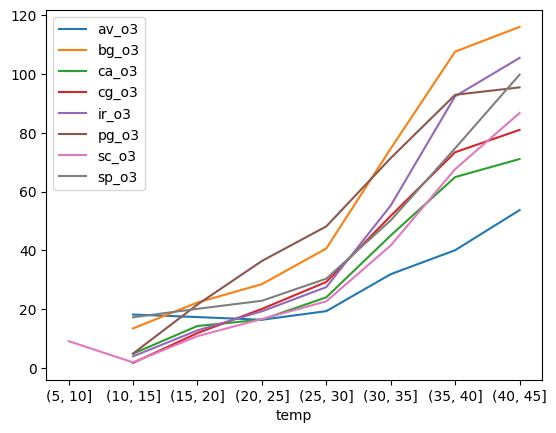

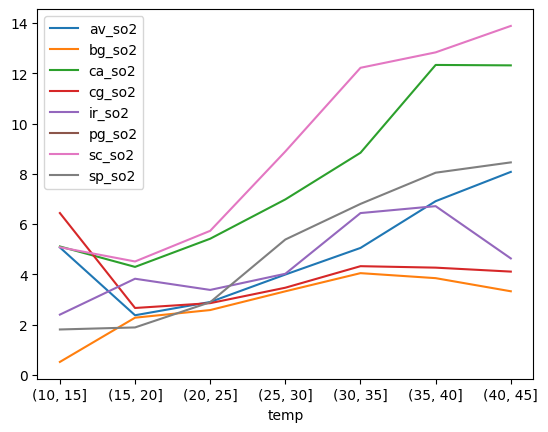

In [13]:
import numpy as np

mean_poluentes_by_temp_av = dados_horarios_qar_av.groupby(pd.cut(dados_horarios_qar_av["temp"], np.arange(5, 50, 5)), observed=False).agg(av_pm10=("pm10","mean"), av_o3=("o3","mean"), av_so2=("so2","mean"))
mean_poluentes_by_temp_bg = dados_horarios_qar_bg.groupby(pd.cut(dados_horarios_qar_bg["temp"], np.arange(5, 50, 5)), observed=False).agg(bg_pm10=("pm10","mean"), bg_o3=("o3","mean"), bg_so2=("so2","mean"))
mean_poluentes_by_temp_ca = dados_horarios_qar_ca.groupby(pd.cut(dados_horarios_qar_ca["temp"], np.arange(5, 50, 5)), observed=False).agg(ca_pm10=("pm10","mean"), ca_o3=("o3","mean"), ca_so2=("so2","mean"))
mean_poluentes_by_temp_cg = dados_horarios_qar_cg.groupby(pd.cut(dados_horarios_qar_cg["temp"], np.arange(5, 50, 5)), observed=False).agg(cg_pm10=("pm10","mean"), cg_o3=("o3","mean"), cg_so2=("so2","mean"))
mean_poluentes_by_temp_ir = dados_horarios_qar_ir.groupby(pd.cut(dados_horarios_qar_ir["temp"], np.arange(5, 50, 5)), observed=False).agg(ir_pm10=("pm10","mean"), ir_o3=("o3","mean"), ir_so2=("so2","mean"))
mean_poluentes_by_temp_pg = dados_horarios_qar_pg.groupby(pd.cut(dados_horarios_qar_pg["temp"], np.arange(5, 50, 5)), observed=False).agg(pg_pm10=("pm10","mean"), pg_o3=("o3","mean"), pg_so2=("so2","mean"))
mean_poluentes_by_temp_sc = dados_horarios_qar_sc.groupby(pd.cut(dados_horarios_qar_sc["temp"], np.arange(5, 50, 5)), observed=False).agg(sc_pm10=("pm10","mean"), sc_o3=("o3","mean"), sc_so2=("so2","mean"))
mean_poluentes_by_temp_sp = dados_horarios_qar_sp.groupby(pd.cut(dados_horarios_qar_sp["temp"], np.arange(5, 50, 5)), observed=False).agg(sp_pm10=("pm10","mean"), sp_o3=("o3","mean"), sp_so2=("so2","mean"))

mean_poluentes_by_temp = pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(mean_poluentes_by_temp_av, mean_poluentes_by_temp_bg, on="temp"), mean_poluentes_by_temp_ca, on="temp"), mean_poluentes_by_temp_cg, on="temp"), mean_poluentes_by_temp_ir, on="temp"), mean_poluentes_by_temp_pg, on="temp"), mean_poluentes_by_temp_sc, on="temp"), mean_poluentes_by_temp_sp, on="temp")
mean_poluentes_by_temp[["av_pm10", "bg_pm10", "ca_pm10", "cg_pm10", "ir_pm10", "pg_pm10", "sc_pm10", "sp_pm10"]].plot()
mean_poluentes_by_temp[["av_o3", "bg_o3", "ca_o3", "cg_o3", "ir_o3", "pg_o3", "sc_o3", "sp_o3"]].plot()
mean_poluentes_by_temp[["av_so2", "bg_so2", "ca_so2", "cg_so2", "ir_so2", "pg_so2", "sc_so2", "sp_so2"]].plot()